# Creating and executing MDF models
>The aim of creating this models is to know how to:
> - Create and execute MDF models with graphs, nodes, parameters and Edges
> - Create and execute MDF models that has a stateful parameter
> - Create and execute MDF models that has a condition controlling the flow node operations.

You can navigate to each section below
- **[Create a Model with three nodes containing unique mathematics expression](#mdf-three-node)**
    - **[Creade a Node that implements the area of a Circle](#model0-node0)**
    - **[Create a Node that gets the diameter of the circle using the previous node output](#model0_node1)**
    - **[Create a Node that gets the perimeter of the circle using the previous node output](#model0_node2)**
    - **[Create Edges between the nodes](#model0_edge0_edge1)**
    - **[Save the model](#model0_save)**
    - **[Generate a graph image from the model](#model0_graph_image)**
    - **[Execute the graph and get the output values](#model0_execute_graph)**
- **[Stateful Parameters in MDF](#model1)**
    - **[Create a node with a stateful parameter for house units](#model1_node0)**
    - **[Create a node with a stateful parameter for house price](#model1_node1)**
    - **[Generate a graph image for the model with a stateful parameters](#model1_graph_image)**
    - **[Execute the graph with a stateful parameters](#model1_eg)**
- **[Conditions in MDF](#model2)**
    - **[Create the nodes](#model2_node0_node1_node2)**
    - **[Add conditions](#model2_add_condition)**
    - **[Generate a graph image for the model using condition](#model2_graph_image)**
    - **[Execute the Graph](#model2_eg)** 


<a class="anchor" id="mdf-three-node"></a>
## 1. Create a Model with three nodes containing unique mathematics expression


Create an MDF that has a graph with three nodes, where each node has mathematical expressions that can be evaluated

<a class="anchor" id="model0"></a>
### 1.1 Create the mdf model with a graph

In [1]:
from modeci_mdf.mdf import *

# create a model
mdf_model_0 = Model(id="MathExpressions-Circle")

# create a graph 
mdf_graph_0 = Graph(id="func_graph")

# append the graph into the model
mdf_model_0.graphs.append(mdf_graph_0)

<a class="anchor" id="model0-node0"></a>
### 1.2 Creade a Node that implements the area of a Circle

In [2]:
from math import pi
# create a node 
node_0_0 = Node(id="area")

# add the node to the graph "mdf_graph_0"
mdf_graph_0.nodes.append(node_0_0)

# add a parameter for radius in the node
node_0_0.parameters.append(Parameter(id="radius", value = 7))

# add a parameter for pi in the node
node_0_0.parameters.append(Parameter(id="pii", value=pi))

# add an ouput port in the node
node_0_0.output_ports.append(OutputPort(id="output", value="pii * radius * radius"))

# print current structure to yaml
print(mdf_graph_0.to_yaml())

func_graph:
    nodes:
        area:
            parameters:
                radius:
                    value: 7
                pii:
                    value: 3.141592653589793
            output_ports:
                output:
                    value: pii * radius * radius



<a class="anchor" id="model0_node1"></a>
### 1.3 Create a Node that gets the diameter of the circle using the previous node output

In [3]:
 # create a second node
node_0_1 = Node(id="diameter")

# add the node to the graph "mdf_graph_0"
mdf_graph_0.nodes.append(node_0_1)

# add an input port
node_0_1.input_ports.append(InputPort(id="input"))

# add parameter to get area
node_0_1.parameters.append(Parameter(id="area", value="input"))

# add parameter to get pi
node_0_1.parameters.append(Parameter(id="pii", value=pi))

# get diameter from area
r = Parameter(id="radius", function="onnx::Pow", args={"X":"area/pii", "Y":0.5})

# add parameter for radius
node_0_1.parameters.append(r)


# add an ouput port
node_0_1.output_ports.append(OutputPort(id="output", value = "2 * radius"))

<a class="anchor" id="model0_node2"></a>
### 1.3 Creade a Node that gets the perimeter of the circle using the previous node output

In [4]:
# create a third node
node_0_2 = Node(id="perimeter")

# add the node to the graph "mdf_graph_0"
mdf_graph_0.nodes.append(node_0_2)

# add an input port
node_0_2.input_ports.append(InputPort(id="input"))

# add parameter to get diameter
node_0_2.parameters.append(Parameter(id="diameter", value="input"))

# add parameter to get pi
node_0_2.parameters.append(Parameter(id="pii", value=pi))


# add an ouput port
node_0_2.output_ports.append(OutputPort(id="output", value = "diameter * pii"))

<a class="anchor" id="model0_edge0_edge1"></a>
### 1.4 Create Edges between the nodes

In [5]:
# create edges between area_node and diameter_node
e1 = Edge(id="area-diameter", sender="area", receiver="diameter", sender_port="output", receiver_port="input")

# create edges between diameter_node and perimeter_node
e2 = Edge(id="diameter-perimeter", sender="diameter", receiver="perimeter", sender_port="output", receiver_port="input")

In [6]:
# add edges to the graph "mdf_graph_0"
mdf_graph_0.edges.extend([e1, e2])

In [7]:
# Print the current structure
print(mdf_graph_0.to_yaml())

func_graph:
    nodes:
        area:
            parameters:
                radius:
                    value: 7
                pii:
                    value: 3.141592653589793
            output_ports:
                output:
                    value: pii * radius * radius
        diameter:
            input_ports:
                input: {}
            parameters:
                area:
                    value: input
                pii:
                    value: 3.141592653589793
                radius:
                    function: onnx::Pow
                    args:
                        X: area/pii
                        Y: 0.5
            output_ports:
                output:
                    value: 2 * radius
        perimeter:
            input_ports:
                input: {}
            parameters:
                diameter:
                    value: input
                pii:
                    value: 3.141592653589793
            output_ports:
                o

<a class="anchor" id="model0_save"></a>
### 1.5 Save the model

In [8]:
mdf_model_0.to_json_file("MathExpressions-Circle.json")
mdf_model_0.to_yaml_file("MathExpressions-Circle.yaml")

'MathExpressions-Circle.yaml'

<a class="anchor" id="model0_graph_image"></a>
### 1.6 Generate a graph image from the model

Converting MDF graph: func_graph to graphviz (level: 3, format: png)
    Node: area
    Node: diameter
    Node: perimeter
    Edge: area-diameter connects area to diameter
    Edge: diameter-perimeter connects diameter to perimeter


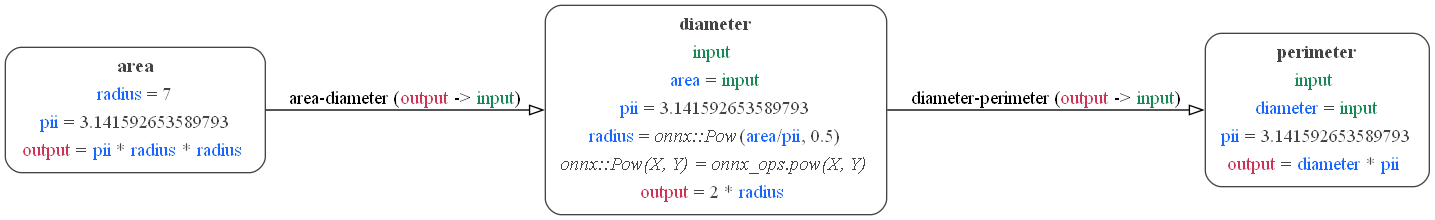

In [9]:
mdf_model_0.to_graph_image(engine="dot", 
                           output_format="png", 
                           view_on_render="False",
                           level=3,
                           filename_root="MathExpressions-Circle",
                           is_horizontal="True"
                          )

from IPython.display import Image
Image(filename="MathExpressions-Circle.png")

<a class="anchor" id="model0_execute_graph"></a>
### 1.7 Execute the graph and get the output values

In [10]:
from modeci_mdf.execution_engine import EvaluableGraph

eg_0 = EvaluableGraph(mdf_graph_0, verbose=False)
eg_0.evaluate()

print(f'\nArea: {eg_0.enodes["area"].evaluable_outputs["output"].curr_value}')
print(f'Diameter: {eg_0.enodes["diameter"].evaluable_outputs["output"].curr_value[0]}')
print(f'Perimeter: {eg_0.enodes["perimeter"].evaluable_outputs["output"].curr_value[0]}\n')

# check the datatype of the diameter node output
print(type(eg_0.enodes["diameter"].evaluable_outputs["output"].curr_value))


Init graph: func_graph
Evaluating graph: func_graph, root nodes: ['area'], with array format numpy

Area: 153.93804002589985
Diameter: 14
Perimeter: 43.982297150257104

<class 'numpy.ndarray'>


<a class="anchor" id="model1"></a>
## 2. Stateful Parameters in MDF

Create another MDF model using stateful parameters in the node(s) of its graph

<a class="anchor" id="model1_node0"></a>
### 2.1 Create a node with a stateful parameter for house units

In [11]:
# Create a model 
mdf_model_1 = Model(id="House-States")

# Create a graph
mdf_graph_1 = Graph(id="house_state_graph")

# Add the graph to the model
mdf_model_1.graphs.append(mdf_graph_1)

# Create the house unit node
house_unit_node = Node(id="house_unit")

# add a parament to the node
house_unit_node.parameters.append(Parameter(id="unit_increment", value=1.0))

# add a stateful parameter
units = Parameter(
    id="no_of_units",
    value="no_of_units + unit_increment",
)

# add the stateful parameter into the node
house_unit_node.parameters.append(units)


# Add an output port
house_unit_node.output_ports.append(OutputPort(id="output", value="no_of_units"))

mdf_graph_1.nodes.append(house_unit_node)
# Print the current structure
print(mdf_graph_1.to_yaml())

house_state_graph:
    nodes:
        house_unit:
            parameters:
                unit_increment:
                    value: 1.0
                no_of_units:
                    value: no_of_units + unit_increment
            output_ports:
                output:
                    value: no_of_units



<a class="anchor" id="model1_node1"></a>
### 2.2 Create a node with a stateful parameter for house price

In [12]:
# Create the house price node 
house_price_node = Node(id="house_price")

# Add parameter with constant for increment as its value
house_price_node.parameters.append(Parameter(id="price_increment", value=175000))

# add a stateful parameter price that changes with increment
price = Parameter(
    id="price",
    value="price + price_increment",
)

# add the price parameter into the node
house_price_node.parameters.append(price)


# Add an output port
house_price_node.output_ports.append(OutputPort(id="output", value="price"))

mdf_graph_1.nodes.append(house_price_node)
# Print the current structure
print(mdf_graph_1.to_yaml())

house_state_graph:
    nodes:
        house_unit:
            parameters:
                unit_increment:
                    value: 1.0
                no_of_units:
                    value: no_of_units + unit_increment
            output_ports:
                output:
                    value: no_of_units
        house_price:
            parameters:
                price_increment:
                    value: 175000
                price:
                    value: price + price_increment
            output_ports:
                output:
                    value: price



<a class="anchor" id="model1_graph_image"></a>
### 2.3 Generate a graph image for the model with a stateful parameters

Converting MDF graph: house_state_graph to graphviz (level: 3, format: png)
    Node: house_unit
    Node: house_price
Written graph image to: house-states.png


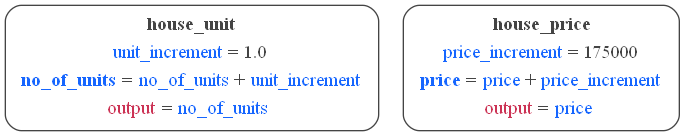

In [13]:
mdf_model_1.to_graph_image(engine="dot", 
                         output_format="png", 
                         view_on_render=False, 
                         level=3, 
                         filename_root="house-states"
                        )
from IPython.display import Image
Image(filename="house-states.png")

<a class="anchor" id="model1_eg"></a>
### 2.4 Execute the graph with a stateful parameters

In [14]:
# Evaluating the mdf_model_graph1 once and printing out the output value

eg_1 = EvaluableGraph(mdf_graph_1, verbose=False)

dt = 1
runtime = 5
t = 0
while t < runtime:
    eg_1.evaluate(time_increment=dt)
#     print(f"runtime_{t}")
    print("\n===== Evaluating at t = %s  ======" % (t))
    #notice that the output increments by 1 because of the stateful parameter setup on the node    
    print('Output of House Units: %s'%eg_1.enodes["house_unit"].evaluable_outputs["output"].curr_value)
    print('Output of Price Units: %s'%eg_1.enodes["house_price"].evaluable_outputs["output"].curr_value)
    print("="*40,"\n")
    t += dt



Init graph: house_state_graph
Evaluating graph: house_state_graph, root nodes: ['house_unit', 'house_price'], with array format numpy

===== Evaluating at t = 0  ======
Output of House Units: 1
Output of Price Units: 175000

Evaluating graph: house_state_graph, root nodes: ['house_unit', 'house_price'], with array format numpy

===== Evaluating at t = 1  ======
Output of House Units: 2
Output of Price Units: 350000

Evaluating graph: house_state_graph, root nodes: ['house_unit', 'house_price'], with array format numpy

===== Evaluating at t = 2  ======
Output of House Units: 3
Output of Price Units: 525000

Evaluating graph: house_state_graph, root nodes: ['house_unit', 'house_price'], with array format numpy

===== Evaluating at t = 3  ======
Output of House Units: 4
Output of Price Units: 700000

Evaluating graph: house_state_graph, root nodes: ['house_unit', 'house_price'], with array format numpy

===== Evaluating at t = 4  ======
Output of House Units: 5
Output of Price Units: 87

<a class="anchor" id="model2"></a>
## 3. Conditions in MDF 

Create another MDF model using conditions to control the implementations of node(s) in its graph

<a class="anchor" id="model2_node0_node1_node2"></a>
### 3.1 Create the nodes

In [15]:
# Create the model 
mdf_model_2 = Model(id="House-Condition")

# Create the graph
mdf_graph_2 = Graph(id="house_condition-graph")

# Add the graph to the model
mdf_model_2.graphs.append(mdf_graph_2)

# Create a node for number of house structures
house_structure_node = Node(id="house_structure")

# add the house_unit_node and house_price_node into this model's graph
# this nodes were created previously for the model with stateful parameters
mdf_graph_2.nodes.append(house_unit_node)
mdf_graph_2.nodes.append(house_price_node)

# Add the house_structure node to this model's graph
mdf_graph_2.nodes.append(house_structure_node)

# Add a parameters
house_structure_node.parameters.append(Parameter(id="no_of_house_structure", value="no_of_house_structure + 1"))

# Add an output port
house_structure_node.output_ports.append(OutputPort(id="output", value="no_of_house_structure"))

# Print current structure as YAML
print(mdf_graph_2.to_yaml())

house_condition-graph:
    nodes:
        house_unit:
            parameters:
                unit_increment:
                    value: 1.0
                no_of_units:
                    value: no_of_units + unit_increment
            output_ports:
                output:
                    value: no_of_units
        house_price:
            parameters:
                price_increment:
                    value: 175000
                price:
                    value: price + price_increment
            output_ports:
                output:
                    value: price
        house_structure:
            parameters:
                no_of_house_structure:
                    value: no_of_house_structure + 1
            output_ports:
                output:
                    value: no_of_house_structure



<a class="anchor" id="model2_add_condition"></a>
### 3.2 Add Conditions

In [16]:
#This condition means that house_unit_node and house_price_node is always executed
cond_0 = Condition(type="Always")

#This condition means that B will execute when A has run 4 times
cond_1 = Condition(type="EveryNCalls", dependencies=house_unit_node.id, n=4)  


In [17]:
#add the conditions to the mdf_graph_2
mdf_graph_2.conditions = ConditionSet(
    node_specific={house_unit_node.id: cond_0, house_price_node.id: cond_0, house_structure_node.id: cond_1},
)

# Print the current structure
print(mdf_graph_2.to_yaml())

house_condition-graph:
    nodes:
        house_unit:
            parameters:
                unit_increment:
                    value: 1.0
                no_of_units:
                    value: no_of_units + unit_increment
            output_ports:
                output:
                    value: no_of_units
        house_price:
            parameters:
                price_increment:
                    value: 175000
                price:
                    value: price + price_increment
            output_ports:
                output:
                    value: price
        house_structure:
            parameters:
                no_of_house_structure:
                    value: no_of_house_structure + 1
            output_ports:
                output:
                    value: no_of_house_structure
    conditions:
        node_specific:
            house_unit:
                type: Always
                kwargs: {}
            house_price:
                type: Always
   

<a class="anchor" id="model2_graph_image"></a>
### 3.3 Generate a graph image for the model using condition

Converting MDF graph: house_condition-graph to graphviz (level: 2, format: png)
    Node: house_unit
    Node: house_price
    Node: house_structure
Written graph image to: house_conditions.png


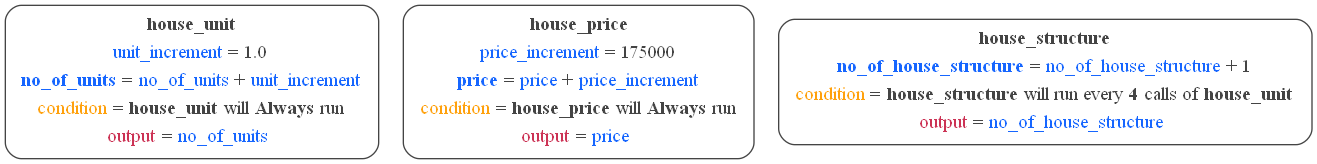

In [18]:
mdf_model_2.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=2,
        filename_root="house_conditions",
        is_horizontal=False
)

from IPython.display import Image
Image(filename="house_conditions.png")

<a class="anchor" id="model2_eg"></a>
### 3.4 Execute the Graph

In [19]:
eg_2 = EvaluableGraph(mdf_graph_2, verbose=False)

eg_2.evaluate()

# house_unit_node will execute 4 times before house_structure_node executes once
print(f'Output of house units: {eg_2.enodes["house_unit"].evaluable_outputs["output"].curr_value}') 

# house_price_node will execute everytime house_unit_node executes
print(f'Output of house prices: {eg_2.enodes["house_price"].evaluable_outputs["output"].curr_value}')

# house_structure_node will execute once for 4 runs of house_unit_node
print(f'Output of house structures: {eg_2.enodes["house_structure"].evaluable_outputs["output"].curr_value}')


Init graph: house_condition-graph
Evaluating graph: house_condition-graph, root nodes: ['house_unit', 'house_price', 'house_structure'], with array format numpy
Output of house units: 4
Output of house prices: 700000
Output of house structures: 1
